# Bağlantı

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


# Lojistik Regresyon

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Model ve Tahmin

In [ ]:
df["Outcome"].value_counts() # Bağımlı değişken hakkında bilgi

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.describe().T # Bağımsız değişkenlerin kısa istatistik özeti

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
y= df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
loj_model = LogisticRegression(solver= "liblinear").fit(X,y)

In [ ]:
loj_model.intercept_ # sabit değerimiz

array([-5.88653539])

In [ ]:
loj_model.coef_ #bağımsız değişkenlerin kat sayıları

array([[ 1.17098692e-01,  2.83673379e-02, -1.69010912e-02,
         7.40100722e-04, -6.42594633e-04,  5.96676293e-02,
         6.83738130e-01,  7.20115615e-03]])

In [ ]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [ ]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred) # karmaşıklık matrisi

array([[448,  52],
       [120, 148]])

In [ ]:
accuracy_score(y, y_pred)# doğruluk oranı

0.7760416666666666

In [ ]:
print(classification_report(y, y_pred)) # Sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [ ]:
loj_model.predict_proba(X)[0:10] # sınıf olasılıkları

array([[0.35045457, 0.64954543],
       [0.91696714, 0.08303286],
       [0.22444087, 0.77555913],
       [0.92140042, 0.07859958],
       [0.16584029, 0.83415971],
       [0.79901575, 0.20098425],
       [0.88016705, 0.11983295],
       [0.27819813, 0.72180187],
       [0.3215012 , 0.6784988 ],
       [0.92264531, 0.07735469]])

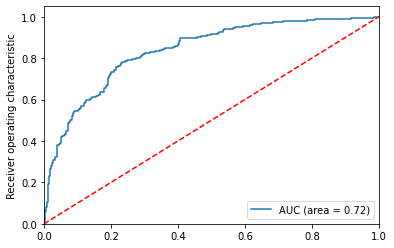

In [ ]:
# Roc eğrisi
logit_roc_auc =roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_Roc')
plt.show()

## Model Tuning (Model Doğrulama)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

In [ ]:
loj_model = LogisticRegression(solver= "liblinear").fit(X_train,y_train)

In [ ]:
y_pred =loj_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7619047619047619


In [ ]:
# k katlı çarpazlama ile hatamız
cross_val_score(loj_model, X_test, y_test, cv= 10).mean()

0.7704710144927536

# K En Yakın Komşu

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model Ve Tahmin

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [ ]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [ ]:
knn_cv_model.best_score_

0.748637316561845

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors= 11).fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

In [ ]:
# accuracy_score için farklı yöntem
knn_tuned.score(X_test, y_test)

0.7316017316017316

# Destek Vektör Makineleri

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model ve Tahmin

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C": np.arange(1,5), "kernel": ["linear","rbf"]} # liner ve liner olmayan kernelleri denemek için

In [ ]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


In [ ]:
svm_cv_model.best_score_

0.7839044652128765

In [ ]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [ ]:
#final model
svm_tuned = SVC(C=2, kernel= "linear").fit(X_train, y_train)

In [ ]:
y_pred = svm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Yapay sinir ağı, Çok katmanlı algılayıcılar, Derin öğrenme

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Model ve Tahmin

In [ ]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
mlpc_model.coefs_

[array([[ 0.22953406,  0.12618279, -0.05985406,  0.03228515, -0.25846157,
         -0.3448772 ,  0.00262625,  0.04486122,  0.11556824,  0.4225468 ,
          0.08449229, -0.05312885, -0.04846738, -0.08595651, -0.02756443,
         -0.05172139,  0.30699001, -0.22505186, -0.03281762, -0.07292641,
          0.04981686, -0.25833745, -0.01715384, -0.02548688,  0.0029802 ,
          0.35708177,  0.08469524, -0.07891653, -0.31367759, -0.09262607,
         -0.04972149, -0.21983448,  0.0775381 , -0.0450318 , -0.10171469,
         -0.12459354,  0.02015847,  0.10169202, -0.15553929, -0.11116847,
         -0.3332162 , -0.15961695,  0.17949236, -0.10447882, -0.13580795,
         -0.17648747,  0.22524834,  0.22425666, -0.10633294,  0.11170119,
         -0.38895421,  0.25787904,  0.09258994, -0.26810523,  0.25652153,
         -0.1125366 ,  0.15730297,  0.25954156, -0.16971863,  0.1151562 ,
         -0.07001991, -0.27798456,  0.10964981, -0.0816461 ,  0.00762034,
         -0.25968921,  0.13315795,  0.

In [ ]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [ ]:
mlpc_params = {"alpha": [1,5, 0.1, 0.01, 0.03, 0.005, 0.0001],
               "hidden_layer_sizes": [(10,10),(100,100,100), (100,100), (3,5)]}# bu gizli katman yapısını belirtir ve önemlidir

In [ ]:
mlpc = MLPClassifier(solver="lbfgs", activation="logistic")

In [ ]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs= -1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  2.8min finished


In [ ]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [ ]:
#final model
mlpc_tuned = MLPClassifier(solver= "lbfgs", activation='logistic', alpha=1, hidden_layer_sizes=(3,5)).fit(X_test,y_test)

In [ ]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7965367965367965

# CART

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model ve Tahmin

In [ ]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning

In [ ]:
cart = DecisionTreeClassifier()

In [ ]:
cart_params = {"max_depth": [1,3,5,8,10],
               "min_samples_split": [2,3,5,10,20,50]}

In [ ]:
cart_cv_model = GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose= 2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


In [ ]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [ ]:
#final model
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train,y_train)

In [ ]:
y_pred= cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model ve Tahmin

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {"n_estimators": [100,200,500,1000], #ağaç sayısı
             "max_features": [3,5,7,8],
             "min_samples_split": [2,5,10,20]}# derinlik ayarı ile ezber yapmasına engel olduk

In [ ]:
rf_cv_model = GridSearchCV(rf, rf_params, cv= 10, n_jobs= -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.6min finished


In [ ]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}

In [ ]:
#final model
rf_tuned = RandomForestClassifier(max_features = 3, min_samples_split = 10, n_estimators = 100).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [ ]:
#Değişken Önem Düzeyleri
rf_tuned.feature_importances_

array([0.06233043, 0.33076708, 0.06400496, 0.05091968, 0.06630404,
       0.17662808, 0.10279677, 0.14624897])

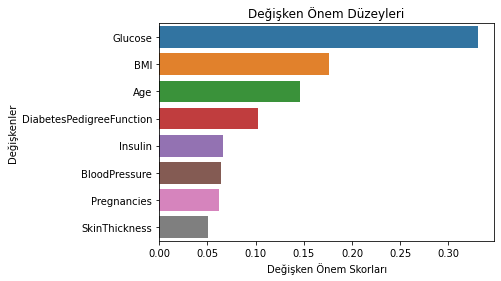

In [ ]:
#Değişken Önem Düzeyleri grafiği
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Gradient Boosting Machines

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors


In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model ve Tahmin

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train) 

In [ ]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [ ]:
gbm = GradientBoostingClassifier()

In [ ]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
              "n_estimators": [100, 300, 500, 1000],
              "max_depth": [2,3,5,8]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs= -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 375 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.5min finished


In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
#final model
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth = 5, n_estimators = 500).fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Değişken Önem Düzeyleri grafiği

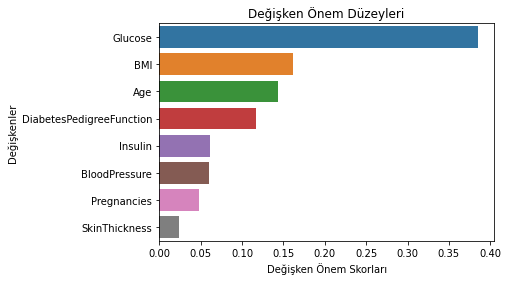

In [ ]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# XGBoost

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model ve Tahmin

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_params = {"n_estimators": [100, 500,],
              "subsample": [0.6,0.8,1],
              "max_depth": [3,5,7],
              "learning_rate": [0.1, 0.001, 0.01]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.2min finished


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
xgb_tuned = xgb= XGBClassifier(learning_rate=0.001, max_depth=7,
                               n_estimators= 500, subsample= 0.6).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

## Değişken Önem Düzeyleri grafiği

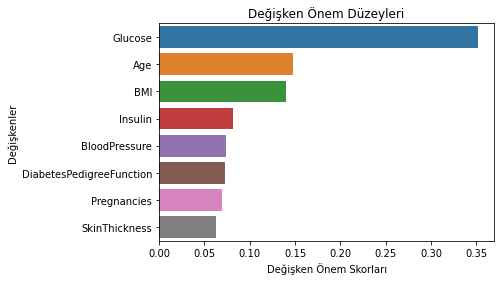

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Light GBM

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors
!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model Ve Tahmin

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.01],
               "n_estimators": [200, 500, 100],
               "max_depth": [1,2,35,8]}

In [ ]:
lgbm_cv_model= GridSearchCV(lgbm, lgbm_params, cv =10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01,
                            max_depth= 1, n_estimators=500).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

## Değişken Önem Düzeyleri grafiği

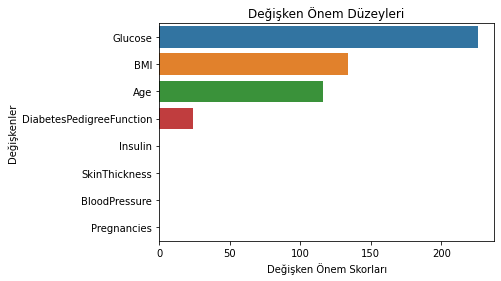

In [ ]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# CatBoost

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler #Standartlaştırma işlemleri için
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
# uyarı engelemek için
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Seti yükleme

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,
                                                    random_state=42)

## Model Ve Tahmin

In [ ]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False) # Bilgi istemediğimiz için verbose false oldu.

In [ ]:
y_pred= catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

## Model Tuning

In [ ]:
catb = CatBoostClassifier(verbose=False)

In [ ]:
catb_params = {"iterations": [200,100],
               "learning_rate": [0.03, 0.1],
               "depth": [5,8]}

In [ ]:
catb_cv_model= GridSearchCV(catb, catb_params, cv=5,
                            n_jobs =-1, verbose=2).fit(X_train,y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostClassifier(depth=8, iterations=200,
                                learning_rate=0.03).fit(X_train, y_train)

In [ ]:
y_pred =cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

## Değişken Önem Düzeyleri grafiği

In [ ]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

AttributeError: ignored

# Tüm Modellerin Karşılaştırılması

In [ ]:
modeller = [
            knn_tuned,
            loj_model,
            svm_tuned,
            mlpc_tuned,
            cart_tuned,
            rf_tuned,
            gbm_tuned,
            catb_tuned,
            lgbm_tuned,
            xgb_tuned] #model nesnesi bunlar
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller", "Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)

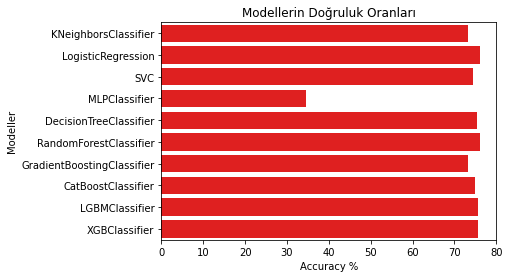

In [ ]:
sns.barplot(x= 'Accuracy', y= 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,76.190476
0,SVC,74.458874
0,MLPClassifier,34.632035
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,76.190476
0,GradientBoostingClassifier,73.160173
0,CatBoostClassifier,74.891775
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576


## Ekstra ne yapılabilir
1-) Değişken türetme / değişken mühendisliği
2-) değişken seçme
3-) Otomatik ML 
4-) Model deployment